# Mulai

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/data_fix.csv')

In [ ]:
df.head()

,topik,Answer,Year,Answer_fix
0,adhd,alo selamat siang dari penjelasan anda anda me...,2024,"['susah', 'fokus', 'susah', 'fokus', 'tanda', ..."
1,adhd,alo terimakasih atas pertanyaannya adhd sering...,2024,"['adhd', 'gejala', 'kisar', 'usia', 'gejala', ..."
2,adhd,alo terimakasih atas pertanyaannya sering mera...,2024,"['cemas', 'gugup', 'tegang', 'sulit', 'konsent..."
3,adhd,alo terimakasih atas pertanyaannya mudah gelis...,2024,"['mudah', 'gelisah', 'sulit', 'fokus', 'tanda'..."
4,adhd,alo terimakasih atas pertanyaannya adhd attent...,2024,"['adhd', 'attention', 'deficit', 'hyperactivit..."


In [ ]:
df['Answer_fix'] = df['Answer_fix'].apply(eval)

# Import Pustaka

In [ ]:
!pip install pyLDAvis
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.9 MB/s eta 0:00:00


In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ekstraksi Fitur

In [ ]:
texts = df['Answer_fix'].tolist()

In [ ]:
# Ekstraksi fitur dengan BOW
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

## simpan ekstraksi fitur ke file

In [ ]:
import pickle

In [ ]:
# Menentukan path
path = '/content/drive/MyDrive/Colab Notebooks/RisetHibahPemerintah/pickle data/'

In [ ]:
# Menyimpan texts ke file
with open(f'{path}texts1.pkl', 'wb') as f:
    pickle.dump(texts, f)

# Menyimpan dictionary ke file
dictionary.save(f'{path}dictionary1.gensim')

# Menyimpan corpus ke file
with open(f'{path}corpus1.pkl', 'wb') as f:
    pickle.dump(corpus, f)

In [ ]:
# # Memuat texts dari file
# with open(f'{path}texts1.pkl', 'rb') as f:
#     texts = pickle.load(f)

# # Memuat dictionary dari file
# dictionary = corpora.Dictionary.load(f'{path}dictionary1.gensim')

# # Memuat corpus dari file
# with open(f'{path}corpus1.pkl', 'rb') as f:
#     corpus = pickle.load(f)

# Membangun topik model

## Mencari coherence values optimal

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, random_state=100, update_every=1, chunksize=100, passes=1, iterations=50, alpha='symmetric', eta='symmetric', per_word_topics=True):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f"Modeling dengan jumlah topik = {num_topics}")
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=random_state,
                         update_every=update_every,
                         chunksize=chunksize,
                         passes=passes,
                         iterations=iterations,
                         alpha=alpha,
                         eta=eta,
                         per_word_topics=per_word_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
# Menjalankan fungsi mencari coherence values
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=50, step=1)

Modeling dengan jumlah topik = 2
Modeling dengan jumlah topik = 3
Modeling dengan jumlah topik = 4
Modeling dengan jumlah topik = 5
Modeling dengan jumlah topik = 6
Modeling dengan jumlah topik = 7
Modeling dengan jumlah topik = 8
Modeling dengan jumlah topik = 9
Modeling dengan jumlah topik = 10
Modeling dengan jumlah topik = 11
Modeling dengan jumlah topik = 12
Modeling dengan jumlah topik = 13
Modeling dengan jumlah topik = 14
Modeling dengan jumlah topik = 15
Modeling dengan jumlah topik = 16
Modeling dengan jumlah topik = 17
Modeling dengan jumlah topik = 18
Modeling dengan jumlah topik = 19
Modeling dengan jumlah topik = 20
Modeling dengan jumlah topik = 21
Modeling dengan jumlah topik = 22
Modeling dengan jumlah topik = 23
Modeling dengan jumlah topik = 24
Modeling dengan jumlah topik = 25
Modeling dengan jumlah topik = 26
Modeling dengan jumlah topik = 27
Modeling dengan jumlah topik = 28
Modeling dengan jumlah topik = 29
Modeling dengan jumlah topik = 30
Modeling dengan jumlah

## simpan model

In [ ]:
# Menyimpan model_list ke file
with open(f'{path}model_list1.pkl', 'wb') as f:
    pickle.dump(model_list, f)

# Menyimpan coherence_values ke file
with open(f'{path}coherence_values1.pkl', 'wb') as f:
    pickle.dump(coherence_values, f)

In [ ]:
# # Memuat kembali data file pickle
# with open(f'{path}model_list1.pkl', 'rb') as f:
#     model_list = pickle.load(f)

# with open(f'{path}coherence_values1.pkl', 'rb') as f:
#     coherence_values = pickle.load(f)

## hasil iterasi

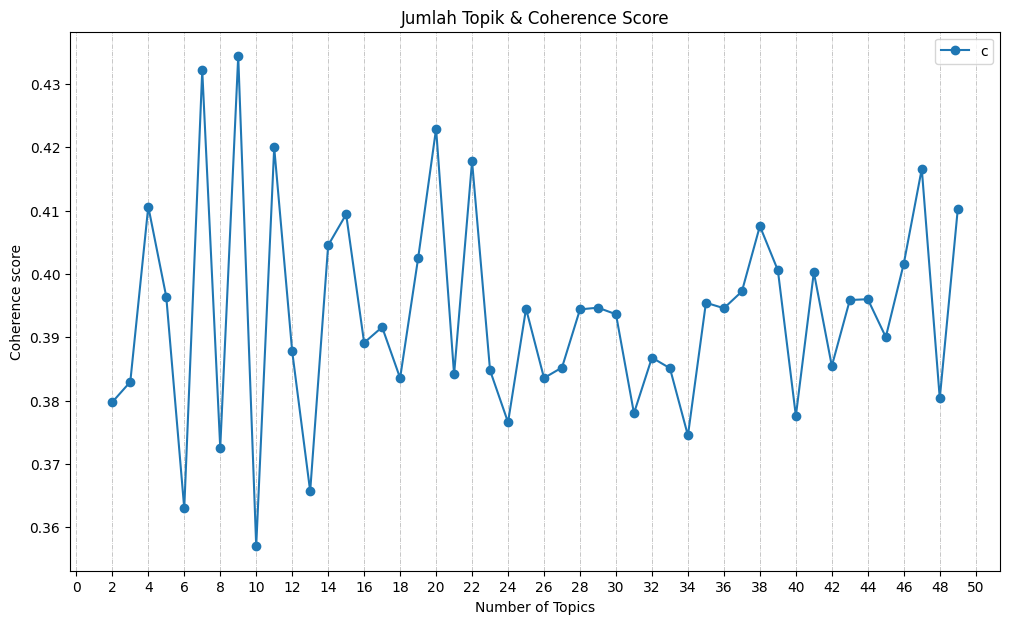

In [ ]:
# Menampilkan grafik coherence score
limit=50; start=2; step=1;
x = range(start, limit, step)

# Membuat plot
plt.figure(figsize=(12, 7))  # Mengatur ukuran grafik memanjang ke samping
plt.plot(x, coherence_values, marker='o')  # Menambahkan marker untuk setiap titik

# Menyesuaikan skala label di sumbu x
plt.xticks(range(1, limit, 2))

# menambahkan garis background
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)

# Menyesuaikan interval grid pada sumbu x
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

plt.title("Jumlah Topik & Coherence Score")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Mencetak nilai coherence score
for m, cv in zip(x, coherence_values):
    print(f"Num Topics = {m} has Coherence Value of {cv}")

Num Topics = 2 has Coherence Value of 0.3797578791426076
Num Topics = 3 has Coherence Value of 0.3829564804731005
Num Topics = 4 has Coherence Value of 0.41064873137367164
Num Topics = 5 has Coherence Value of 0.39639084898817945
Num Topics = 6 has Coherence Value of 0.36295945603164487
Num Topics = 7 has Coherence Value of 0.4321514443662325
Num Topics = 8 has Coherence Value of 0.3725600542271796
Num Topics = 9 has Coherence Value of 0.4343969286654574
Num Topics = 10 has Coherence Value of 0.35699073955326444
Num Topics = 11 has Coherence Value of 0.41999014959152986
Num Topics = 12 has Coherence Value of 0.38777437097930295
Num Topics = 13 has Coherence Value of 0.3656675553472524
Num Topics = 14 has Coherence Value of 0.4045208604151008
Num Topics = 15 has Coherence Value of 0.4094247895609932
Num Topics = 16 has Coherence Value of 0.3891337226182775
Num Topics = 17 has Coherence Value of 0.39160614500422947
Num Topics = 18 has Coherence Value of 0.38355385553174964
Num Topics = 1

In [ ]:
# Menentukan jumlah topik optimal berdasarkan coherence value terbaik
max_coherence = max(coherence_values)
print(f"Nilai coherence tertinggi: {max_coherence}")
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print(f"Jumlah topik yang memberikan nilai coherence tertinggi: {optimal_num_topics}")

Nilai coherence tertinggi: 0.4343969286654574
Jumlah topik yang memberikan nilai coherence tertinggi: 9


In [ ]:
# Mengambil model optimal dengan nilai coherence tertinggi
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]

## metode input manual jumlah topik

In [ ]:
# optimal_num_topics = 5
# optimal_num_topics

In [ ]:
# # Membangun model LDA dengan jumlah topik optimal dan pengaturan tambahan untuk meningkatkan akurasi
# optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                                 id2word=dictionary,
#                                                 num_topics=optimal_num_topics,
#                                                 random_state=100,
#                                                 update_every=1,
#                                                 chunksize=100,
#                                                 passes=1,
#                                                 iterations=50,
#                                                 alpha='symmetric',
#                                                 eta='symmetric',
#                                                 per_word_topics=True)

## hasil model

In [ ]:
# Menyimpan model ke file pickle
with open(f'{path}lda_bow_model.pkl', 'wb') as f:
    pickle.dump(optimal_model, f)

In [ ]:
# # Menghitung nilai coherence dari model optimal
# coherence_model_lda = CoherenceModel(model=optimal_model, texts=texts, dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()

# # Menampilkan nilai coherence
# print(f"Coherence Score: {coherence_lda}")

In [ ]:
# Menampilkan topik dengan pprint
from pprint import pprint
pprint(optimal_model.print_topics())

[(0,
  '0.062*"hamil" + 0.044*"anak" + 0.029*"tua" + 0.022*"rahim" + 0.021*"marah" '
  '+ 0.020*"usia" + 0.017*"emosi" + 0.017*"bantu" + 0.015*"teman" + '
  '0.015*"keluarga"'),
 (1,
  '0.055*"periksa" + 0.052*"darah" + 0.042*"sakit" + 0.028*"kepala" + '
  '0.026*"dokter" + 0.022*"tubuh" + 0.019*"jantung" + 0.017*"fisik" + '
  '0.017*"infeksi" + 0.017*"minum"'),
 (2,
  '0.059*"makan" + 0.038*"konsumsi" + 0.035*"berat" + 0.034*"badan" + '
  '0.030*"hormon" + 0.028*"kandung" + 0.022*"obat" + 0.020*"turun" + '
  '0.020*"otak" + 0.020*"efek"'),
 (3,
  '0.023*"kondisi" + 0.016*"alami" + 0.015*"pikir" + 0.014*"cabut" + '
  '0.012*"beda" + 0.011*"bentuk" + 0.011*"psikiater" + 0.011*"salah" + '
  '0.011*"laku" + 0.010*"asa"'),
 (4,
  '0.036*"rambut" + 0.035*"nyeri" + 0.031*"cemas" + 0.024*"gejala" + '
  '0.019*"ganggu" + 0.019*"kulit" + 0.017*"panik" + 0.016*"otot" + '
  '0.015*"keluh" + 0.014*"obat"'),
 (5,
  '0.041*"ganggu" + 0.039*"keluh" + 0.034*"kondisi" + 0.031*"stres" + '
  '0.028*"alam

In [ ]:
# Hanya memuat kata teratas
topics = [[(term, round(wt, 3)) for term, wt in optimal_model.show_topic(n, topn=30)] for n in range(0, optimal_model.num_topics)]

# # Mendefinisikan seluruh corpus dari topik-topik dalam model LDA
# topics = [[(term, round(wt, 3)) for term, wt in optimal_model.show_topic(n, topn=None)] for n in range(optimal_model.num_topics)]

In [ ]:
# Membuat DataFrame untuk Topic-Term
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns=['Term'+str(i) for i in range(1, 31)], index=['Topic '+str(t) for t in range(1, optimal_model.num_topics+1)]).T

# # Membuat DataFrame untuk seluruh Topic-Term
# topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics],
#                          columns=['Term'+str(i) for i in range(1, len(topics[0])+1)],
#                          index=['Topic '+str(t) for t in range(1, optimal_model.num_topics+1)]).T

topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Term1,hamil,periksa,makan,kondisi,rambut,ganggu,dokter,ganggu,ganggu
Term2,anak,darah,konsumsi,alami,nyeri,keluh,obat,keluh,menstruasi
Term3,tua,sakit,berat,pikir,cemas,kondisi,periksa,dokter,depresi
Term4,rahim,kepala,badan,cabut,gejala,stres,ganggu,stres,haid
Term5,marah,dokter,hormon,beda,ganggu,alami,gejala,kondisi,gejala
Term6,usia,tubuh,kandung,bentuk,kulit,tidur,jiwa,hidup,alami
Term7,emosi,jantung,obat,psikiater,panik,dokter,keluh,skizofrenia,siklus
Term8,bantu,fisik,turun,salah,otot,hindar,spesialis,bantu,ubah
Term9,teman,infeksi,otak,laku,keluh,stress,kondisi,lambung,wanita
Term10,keluarga,minum,efek,asa,obat,laku,terapi,laku,sedih


In [ ]:
pd.set_option('display.max_colwidth', None)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns=['Terms per Topic'], index=['Topic'+str(t) for t in range(1, optimal_model.num_topics+1)])
topics_df

,Terms per Topic
Topic1,"hamil, anak, tua, rahim, marah, usia, emosi, bantu, teman, keluarga, kondisi, suami, ayah, janin, pasang, lahir, rumah, mudah, hormonal, laki, hubung, ubah, tumbuh, ajak, bayi, wajah, coba, adik, pijat, program"
Topic2,"periksa, darah, sakit, kepala, dokter, tubuh, jantung, fisik, infeksi, minum, stres, air, hindar, istirahat, rokok, tekan, ganggu, makan, lelah, putih, atur, psikis, hamil, usg, tes, tunjang, demam, langsung, cair, jaga"
Topic3,"makan, konsumsi, berat, badan, hormon, kandung, obat, turun, otak, efek, samping, tubuh, kondisi, tingkat, dokter, imbang, buah, asam, lambat, sakit, atur, seksual, pengaruh, reproduksi, sayur, akibat, ideal, alami, diet, flek"
Topic4,"kondisi, alami, pikir, cabut, beda, bentuk, psikiater, salah, laku, asa, sekian, konsultasi, hidup, psikolog, rambut, mental, paham, hadap, temu, butuh, bicara, sosial, kontrol, kerja, cerna, sadar, cari, hubung, sulit, halusinasi"
Topic5,"rambut, nyeri, cemas, gejala, ganggu, kulit, panik, otot, keluh, obat, serang, takut, kepala, muncul, debar, napas, faktor, kondisi, mual, timbul, sesak, keringat, perut, gatal, dada, jantung, pusing, tegang, cabut, alami"
Topic6,"ganggu, keluh, kondisi, stres, alami, tidur, dokter, hindar, stress, laku, bantu, cemas, olahraga, pikir, aktivitas, sehat, konsultasi, istirahat, coba, periksa, makan, atur, kelola, konsumsi, hidup, positif, psikologis, picu, sesuai, relaksasi"
Topic7,"dokter, obat, periksa, ganggu, gejala, jiwa, keluh, spesialis, kondisi, terapi, bantu, langsung, saran, sehat, pasien, mental, sakit, konsultasi, anjur, sesuai, psikiater, diagnosis, evaluasi, derita, informasi, medis, tunjang, stress, riwayat, sekian"
Topic8,"ganggu, keluh, dokter, stres, kondisi, hidup, skizofrenia, bantu, lambung, laku, jiwa, jalan, muncul, pikir, aktivitas, agam, sehat, organ, alami, langsung, olahraga, alkohol, sulit, delusi, periksa, atur, tidur, sembarang, makan, pribadi"
Topic9,"ganggu, menstruasi, depresi, haid, gejala, alami, siklus, ubah, wanita, sedih, asa, berat, mood, tanda, hormonal, obat, kontrasepsi, derita, kondisi, mental, sakit, suasana, hilang, minggu, hati, lelah, turun, faktor, salah, hidup"


#visualisasi

In [ ]:
# Membuat WordCloud
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
plt.rcParams['figure.figsize'] = [20, 15]

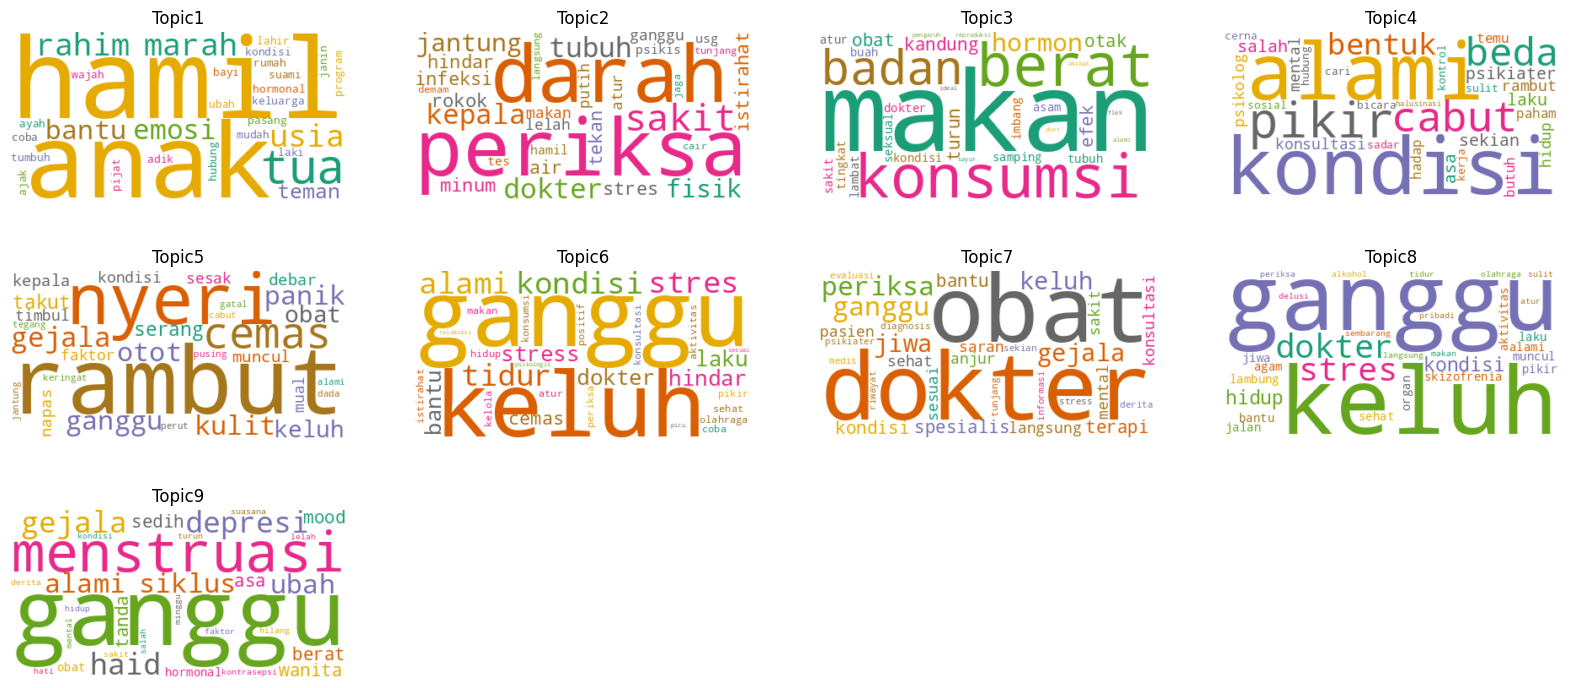

In [ ]:
# Membuat subgrafik untuk setiap topik
for i in range(optimal_model.num_topics):
    wc.generate(text=topics_df["Terms per Topic"][i])
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [ ]:
# Menampilkan visualisasi interaktif dengan pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(vis)

# Analisis

## Membuat dataframe corpus

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts, num_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num, topn=num_words)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]])], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts, num_words=30)

In [ ]:
# Format dataframe
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
# Create a dataframe to hold results
corpus_topic_df = pd.DataFrame()

# Get the Titles from the original dataframe
corpus_topic_df['row'] = df.index + 1
corpus_topic_df['topik'] = df.topik

# Add dominant topic and contribution to the dataframe
corpus_topic_df['Dominant Topic'] = df_dominant_topic['Dominant_Topic'] + 1
corpus_topic_df['Contribution %'] = df_dominant_topic['Topic_Perc_Contrib'] * 100
corpus_topic_df['Topic Terms'] = df_dominant_topic['Keywords']

In [ ]:
# Display the dataframe
corpus_topic_df.head()

,row,topik,Dominant Topic,Contribution %,Topic Terms
0,1,adhd,6,65.180000,"ganggu, keluh, kondisi, stres, alami, tidur, dokter, hindar, stress, laku, bantu, cemas, olahraga, pikir, aktivitas, sehat, konsultasi, istirahat, coba, periksa, makan, atur, kelola, konsumsi, hidup, positif, psikologis, picu, sesuai, relaksasi"
1,2,adhd,4,44.580002,"kondisi, alami, pikir, cabut, beda, bentuk, psikiater, salah, laku, asa, sekian, konsultasi, hidup, psikolog, rambut, mental, paham, hadap, temu, butuh, bicara, sosial, kontrol, kerja, cerna, sadar, cari, hubung, sulit, halusinasi"
2,3,adhd,8,43.250000,"ganggu, keluh, dokter, stres, kondisi, hidup, skizofrenia, bantu, lambung, laku, jiwa, jalan, muncul, pikir, aktivitas, agam, sehat, organ, alami, langsung, olahraga, alkohol, sulit, delusi, periksa, atur, tidur, sembarang, makan, pribadi"
3,4,adhd,8,68.760002,"ganggu, keluh, dokter, stres, kondisi, hidup, skizofrenia, bantu, lambung, laku, jiwa, jalan, muncul, pikir, aktivitas, agam, sehat, organ, alami, langsung, olahraga, alkohol, sulit, delusi, periksa, atur, tidur, sembarang, makan, pribadi"
4,5,adhd,4,27.599998,"kondisi, alami, pikir, cabut, beda, bentuk, psikiater, salah, laku, asa, sekian, konsultasi, hidup, psikolog, rambut, mental, paham, hadap, temu, butuh, bicara, sosial, kontrol, kerja, cerna, sadar, cari, hubung, sulit, halusinasi"


## Distribusi Topik Dominan di Seluruh Dokumen

In [ ]:
# Menghitung jumlah dokumen dan persentase total dokumen untuk setiap topik dominan
dominant_topic_df = corpus_topic_df['Dominant Topic'].value_counts(normalize=False).reset_index()
dominant_topic_df.columns = ['Dominant Topic', 'Document Count']
dominant_topic_df['Total Document Percentage'] = (dominant_topic_df['Document Count'] * 100) / len(corpus)

dominant_topic_df

,Dominant Topic,Document Count,Total Document Percentage
0,6,4665,30.448404
1,4,3173,20.710136
2,9,2204,14.385484
3,8,1895,12.368644
4,7,1050,6.853339
5,5,916,5.978722
6,2,540,3.524574
7,3,463,3.021996
8,1,415,2.708700


## Distribusi topik dominan berdasarkan topik asli

In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

,row,topik,Dominant Topic,Contribution %,Topic Terms
0,579,bipolar,1,77.779999,"hamil, anak, tua, rahim, marah, usia, emosi, bantu, teman, keluarga, kondisi, suami, ayah, janin, pasang, lahir, rumah, mudah, hormonal, laki, hubung, ubah, tumbuh, ajak, bayi, wajah, coba, adik, pijat, program"
1,13027,serangan panik,2,72.599998,"periksa, darah, sakit, kepala, dokter, tubuh, jantung, fisik, infeksi, minum, stres, air, hindar, istirahat, rokok, tekan, ganggu, makan, lelah, putih, atur, psikis, hamil, usg, tes, tunjang, demam, langsung, cair, jaga"
2,63,adhd,3,78.689995,"makan, konsumsi, berat, badan, hormon, kandung, obat, turun, otak, efek, samping, tubuh, kondisi, tingkat, dokter, imbang, buah, asam, lambat, sakit, atur, seksual, pengaruh, reproduksi, sayur, akibat, ideal, alami, diet, flek"
3,4667,gangguan kepribadian,4,94.849998,"kondisi, alami, pikir, cabut, beda, bentuk, psikiater, salah, laku, asa, sekian, konsultasi, hidup, psikolog, rambut, mental, paham, hadap, temu, butuh, bicara, sosial, kontrol, kerja, cerna, sadar, cari, hubung, sulit, halusinasi"
4,6814,kesehatan mental,5,87.300003,"rambut, nyeri, cemas, gejala, ganggu, kulit, panik, otot, keluh, obat, serang, takut, kepala, muncul, debar, napas, faktor, kondisi, mual, timbul, sesak, keringat, perut, gatal, dada, jantung, pusing, tegang, cabut, alami"
5,12704,serangan panik,6,98.709999,"ganggu, keluh, kondisi, stres, alami, tidur, dokter, hindar, stress, laku, bantu, cemas, olahraga, pikir, aktivitas, sehat, konsultasi, istirahat, coba, periksa, makan, atur, kelola, konsumsi, hidup, positif, psikologis, picu, sesuai, relaksasi"
6,179,bipolar,7,85.119995,"dokter, obat, periksa, ganggu, gejala, jiwa, keluh, spesialis, kondisi, terapi, bantu, langsung, saran, sehat, pasien, mental, sakit, konsultasi, anjur, sesuai, psikiater, diagnosis, evaluasi, derita, informasi, medis, tunjang, stress, riwayat, sekian"
7,5000,gangguan mental,8,96.490005,"ganggu, keluh, dokter, stres, kondisi, hidup, skizofrenia, bantu, lambung, laku, jiwa, jalan, muncul, pikir, aktivitas, agam, sehat, organ, alami, langsung, olahraga, alkohol, sulit, delusi, periksa, atur, tidur, sembarang, makan, pribadi"
8,7974,percobaan bunuh diri,9,98.320000,"ganggu, menstruasi, depresi, haid, gejala, alami, siklus, ubah, wanita, sedih, asa, berat, mood, tanda, hormonal, obat, kontrasepsi, derita, kondisi, mental, sakit, suasana, hilang, minggu, hati, lelah, turun, faktor, salah, hidup"
